<a href="https://colab.research.google.com/github/MateusGheorghe/LAMP/blob/master/Medley_Step_3_Features_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [0]:
SAVE=0 #SAVE == 1 for save files / == 0 do not save
SEED=8 #Arbitrary seed.

In [431]:
from google.colab import drive
drive.mount("/gdrive")
import os
os.chdir("/gdrive/My Drive/MESTRADO/Natacao")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
import numpy as np 
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px
from scipy.io import loadmat
from mpl_toolkits import mplot3d
from sklearn import preprocessing
import pickle
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, cross_validate, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import time

In [0]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
from matplotlib.ticker import FuncFormatter, MaxNLocator
import matplotlib.pyplot as plt
SMALL_SIZE = 22
MEDIUM_SIZE = 42
BIGGER_SIZE = 62
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [0]:
def tic():
    #Homemade version of matlab tic and toc functions
    global startTime_for_tictoc
    startTime_for_tictoc = time.time()

def toc():
    if 'startTime_for_tictoc' in globals():
        print ('\nElapsed time is ')
        print (str(time.time() - startTime_for_tictoc))
        print('seconds.\n')
    else:
        print ('\nToc: start time not set\n')

In [0]:
def TIC():
    #Homemade version of matlab tic and toc functions
    import time
    global startTime_for_tictoc1
    startTime_for_tictoc1 = time.time()

def TOC():
    import time
    if 'startTime_for_tictoc1' in globals():
        print ('\nElapsed time is ')
        print (str(time.time() - startTime_for_tictoc1))
        print('seconds.\n')
    else:
        print ('\nToc: start time not set\n')

In [436]:
ls

 BD_AI_bucket.csv      'Medley-Step_1 - Exploratory_Data_Analysis.ipynb'
 BD_AI_crossover.csv   'Medley-Step_2 - Model_Definition.ipynb'
 BD_AI_open.csv        'Medley-Step_3 - Features_Analysis.ipynb'
 BD_AI_somersault.csv   Model_Medley_Results.pickle
 BD_Medley.pickle       Original_medleyturn_Helon.xls


# Features Analysis

In [0]:
TIC()

In [0]:
BD={}
with open('BD_Medley.pickle', 'rb') as filename:
  BD[0],BD[1],BD[2],BD[3] = pickle.load(filename)
BD_Label={0:'Bucket',1:'Crossover',2:'Open',3:'Somersault'}
with open('Model_Medley_Results.pickle', 'rb') as filename:
  models,params,BestParams,BestMSE,BestR2 = pickle.load(filename)

In [439]:
X={}
y={}
INPUT_DIM={}
N={}
for j in range(0,4):
  X[j]=np.array(BD[j].values[:,0:np.size(BD[j],axis=1)-1],dtype='float64')
  y[j]=np.array(BD[j]['TotalTurntime15m'],dtype='float64')
  INPUT_DIM[j]=np.size(X[j],axis=1) # Number of features
  N[j]=np.size(X[j],axis=0)
  print('Dataset {} ({})'.format(j,BD_Label[j]))
  print('Number of features:{}'.format(INPUT_DIM[j]))
  print('Number of samples: {}'.format(N[j]))
  print(' ')

Dataset 0 (Bucket)
Number of features:10
Number of samples: 45
 
Dataset 1 (Crossover)
Number of features:11
Number of samples: 51
 
Dataset 2 (Open)
Number of features:12
Number of samples: 60
 
Dataset 3 (Somersault)
Number of features:11
Number of samples: 53
 


In [0]:
from numpy.random import seed
seed(SEED)

# SHAP - Features Importance

In [441]:
!pip install shap
import shap

Default GBST escolhido devido a ser o algoritmo que apresentou os melhores resultados no LOOCV randomized parameter earch procedure.

In [0]:
#Model Chosen
model = models['GBST']

In [0]:
def SHAP_Feat_Importance(model,X,y):
  model.fit(X,y)
  print(model.feature_importances_)
  importances = model.feature_importances_
  indices = np.argsort(importances)
  features = X.columns
  plt.title('Feature Importances')
  plt.barh(range(len(indices)), importances[indices], color='b', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')
  plt.show()
  return importances,indices,features

Bucket

In [0]:
importances={}
indices={}
features={}

[2.83762711e-01 7.19258646e-03 7.36553442e-04 3.71849885e-03
 1.02462008e-03 1.73592932e-02 6.84538999e-01 1.15818059e-04
 1.52234308e-03 2.85772396e-05]


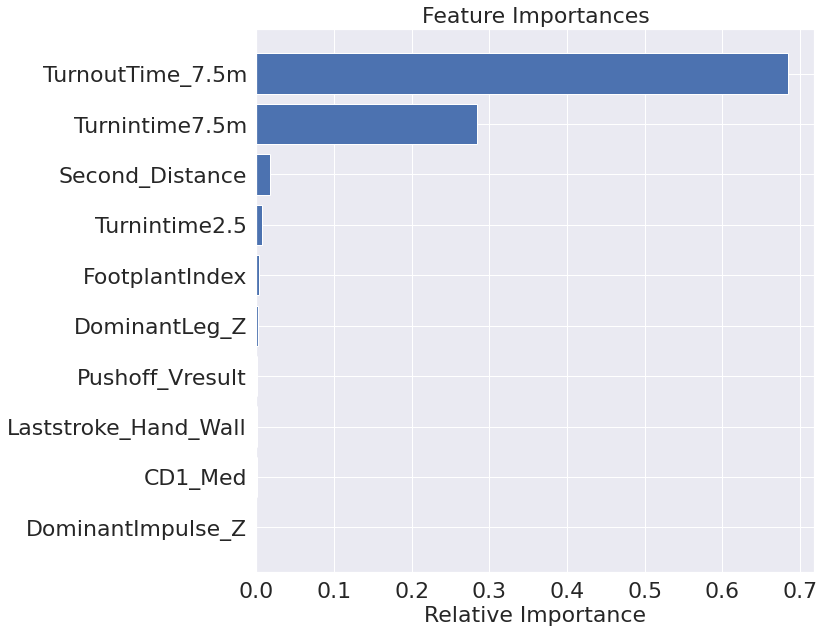

In [445]:
X=BD[0].drop(['TotalTurntime15m'], axis=1)
y=np.array(BD[0]['TotalTurntime15m'],dtype='float64')
importances[0],indices[0],features[0]=SHAP_Feat_Importance(model,X,y)

Crossover

[6.46959684e-01 2.54839564e-03 5.53630517e-04 9.46742403e-04
 2.61309626e-03 2.48002854e-02 2.27420341e-03 3.08542528e-01
 7.05171678e-03 5.63553968e-04 3.14616311e-03]


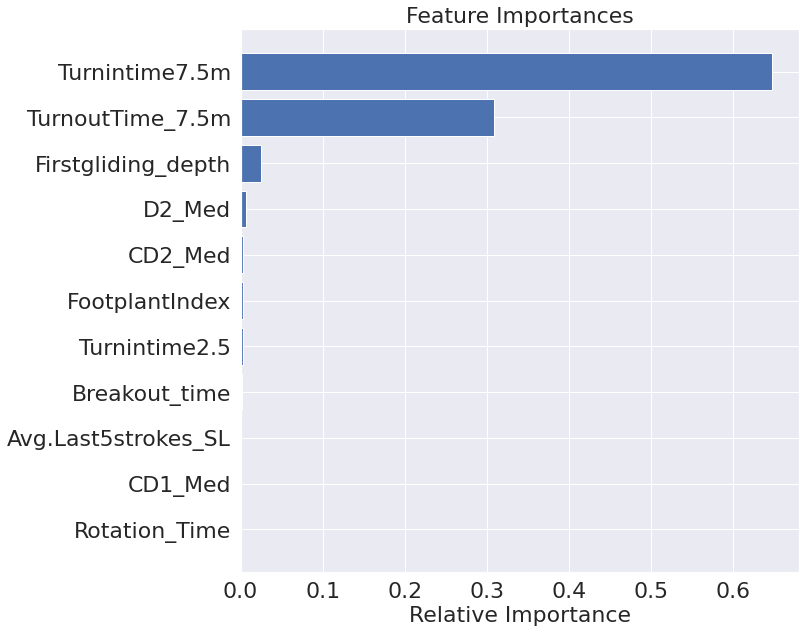

In [446]:
X=BD[1].drop(['TotalTurntime15m'], axis=1)
y=np.array(BD[1]['TotalTurntime15m'],dtype='float64')
importances[1],indices[1],features[1]=SHAP_Feat_Importance(model,X,y)

Open

[2.29077447e-01 4.90545018e-03 3.52631313e-05 3.70155808e-03
 7.76702281e-05 1.26916450e-04 3.77065189e-03 7.52848266e-01
 2.82031225e-04 3.06170906e-03 1.31645753e-03 7.96579509e-04]


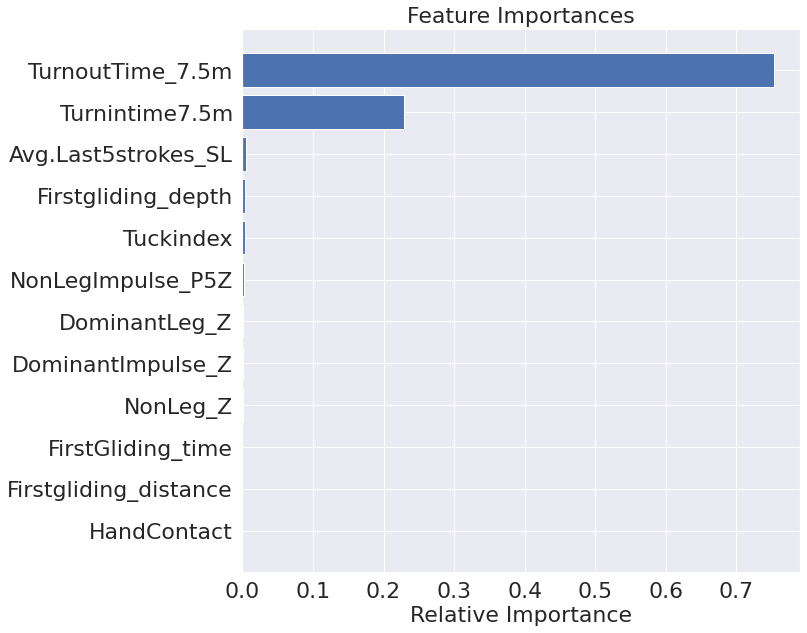

In [447]:
X=BD[2].drop(['TotalTurntime15m'], axis=1)
y=np.array(BD[2]['TotalTurntime15m'],dtype='float64')
importances[2],indices[2],features[2]=SHAP_Feat_Importance(model,X,y)

Somersault

[1.78658149e-01 9.51615848e-03 2.85184190e-04 2.76843058e-04
 1.50487503e-02 9.20491514e-05 4.09651122e-03 8.54170090e-03
 7.76368844e-01 3.00612307e-03 4.10968659e-03]


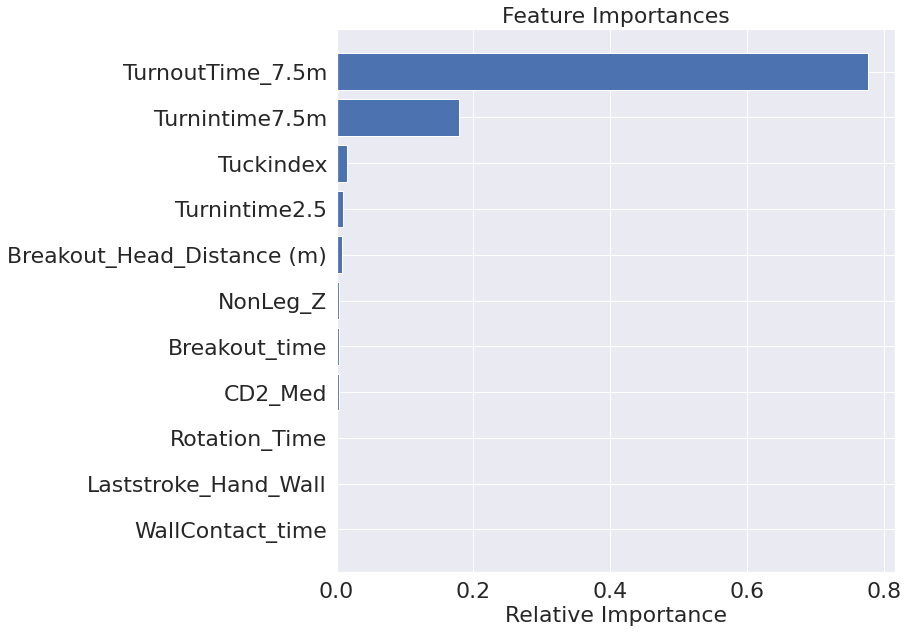

In [448]:
X=BD[3].drop(['TotalTurntime15m'], axis=1)
y=np.array(BD[3]['TotalTurntime15m'],dtype='float64')
importances[3],indices[3],features[3]=SHAP_Feat_Importance(model,X,y)

# pyGAM - Features Analysis

In [449]:
!pip install pygam
!pip install flit

In [0]:
from pygam import LinearGAM
import flit

In [0]:
def LinGAM(X,y):
  # lams=np.random.uniform(1e-3,1e3,(100,np.size(X,axis=1)))
  # gam=LinearGAM(n_splines=[5,7,7,7,7,7,7,5,7,5]).gridsearch(X.values,y,lam=lams)
  gam=LinearGAM().fit(X.values,y)
  print(gam.summary())
  plt.plot(gam.predict(X))
  plt.plot(y)
  return gam

In [0]:
def PlotAllFeatDep(X,gam):
  titles = X.columns
  plt.figure()
  fig, axs = plt.subplots(1,np.size(X,axis=1),figsize=(40, 8))
  for i, ax in enumerate(axs):
      XX = gam.generate_X_grid(term=i)
      ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
      ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX,   width=.95)[1], c='r', ls='--')
      if i == 0:
          # ax.set_ylim(-30,30)
          ax.set_ylim(-0.2,1.2)
      ax.set_title(titles[i])

Default GBST escolhido devido a ser o algoritmo que apresentou os melhores resultados no LOOCV randomized parameter search procedure.

Bucket

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      8.8035
Link Function:                     IdentityLink Log Likelihood:                                  -753.1691
Number of Samples:                           45 AIC:                                             1525.9451
                                                AICc:                                            1532.1393
                                                GCV:                                                0.0311
                                                Scale:                                              0.0204
                                                Pseudo R-Squared:                                   0.7638
Feature Function                  Lam

KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 



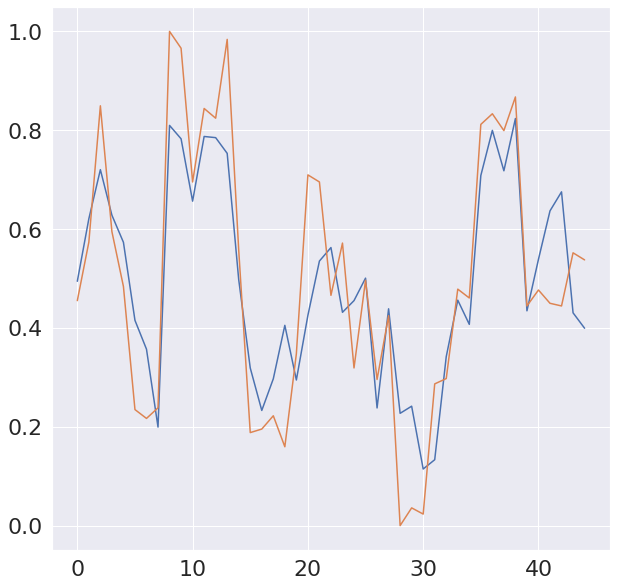

In [453]:
X=BD[0].drop(['TotalTurntime15m'], axis=1)
y=np.array(BD[0]['TotalTurntime15m'],dtype='float64')
gam=LinGAM(X,y)

<Figure size 720x720 with 0 Axes>

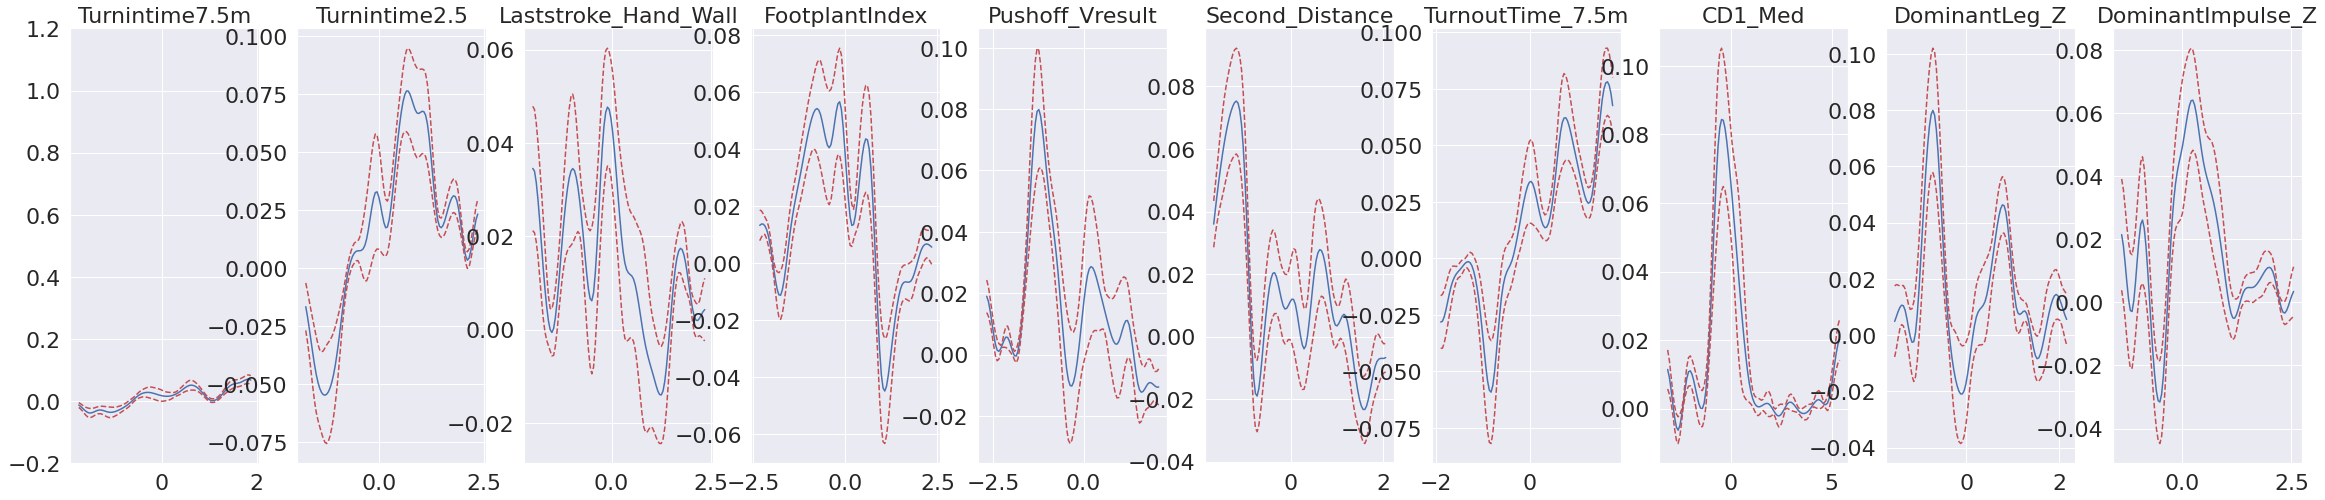

In [454]:
PlotAllFeatDep(X,gam)

Crossover

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     11.5368
Link Function:                     IdentityLink Log Likelihood:                                 -1334.7516
Number of Samples:                           51 AIC:                                             2694.5769
                                                AICc:                                            2703.6369
                                                GCV:                                                0.0217
                                                Scale:                                              0.0131
                                                Pseudo R-Squared:                                   0.7743
Feature Function                  Lam

KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 



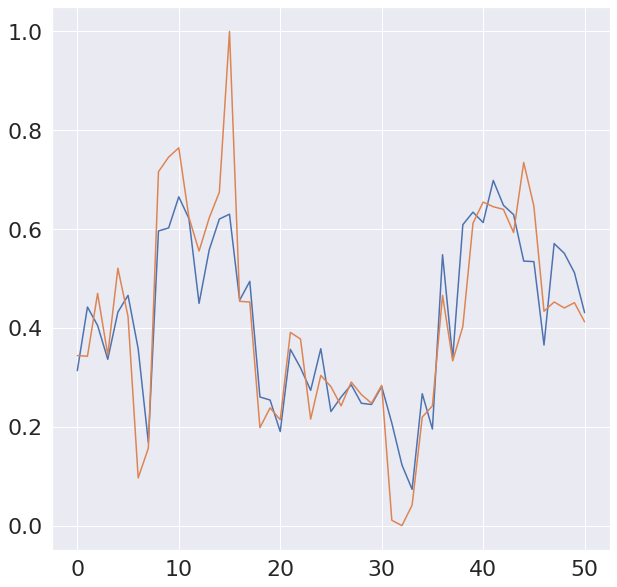

In [455]:
X=BD[1].drop(['TotalTurntime15m'], axis=1)
y=np.array(BD[1]['TotalTurntime15m'],dtype='float64')
gam=LinGAM(X,y)

<Figure size 720x720 with 0 Axes>

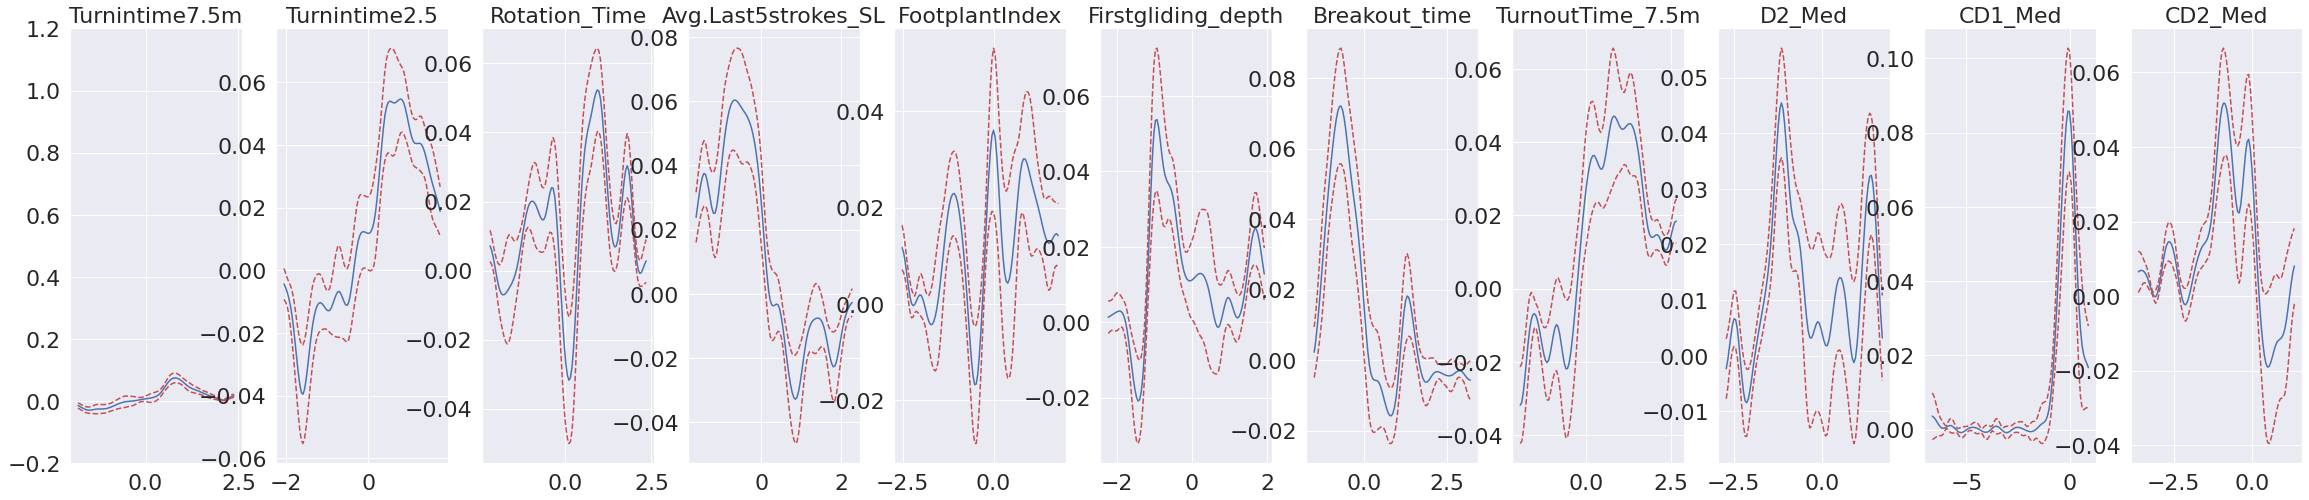

In [456]:
PlotAllFeatDep(X,gam)

Open

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     16.1155
Link Function:                     IdentityLink Log Likelihood:                                  -1257.349
Number of Samples:                           60 AIC:                                             2548.9291
                                                AICc:                                            2563.7344
                                                GCV:                                                0.0284
                                                Scale:                                              0.0151
                                                Pseudo R-Squared:                                   0.8165
Feature Function                  Lam

KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 



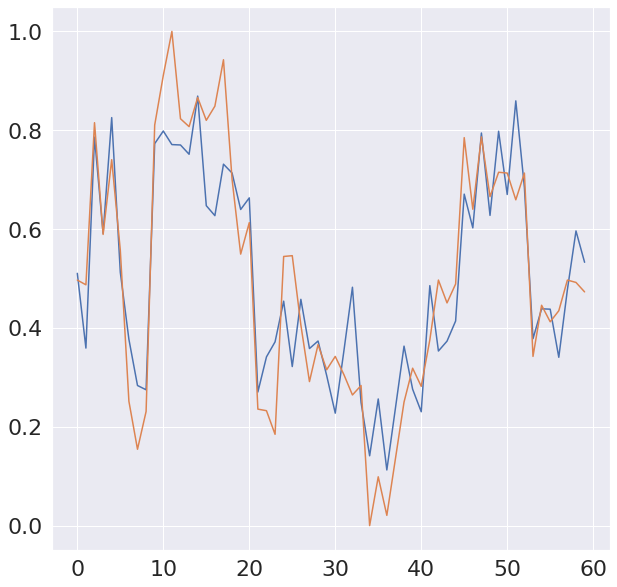

In [457]:
X=BD[2].drop(['TotalTurntime15m'], axis=1)
y=np.array(BD[2]['TotalTurntime15m'],dtype='float64')
gam=LinGAM(X,y)

<Figure size 720x720 with 0 Axes>

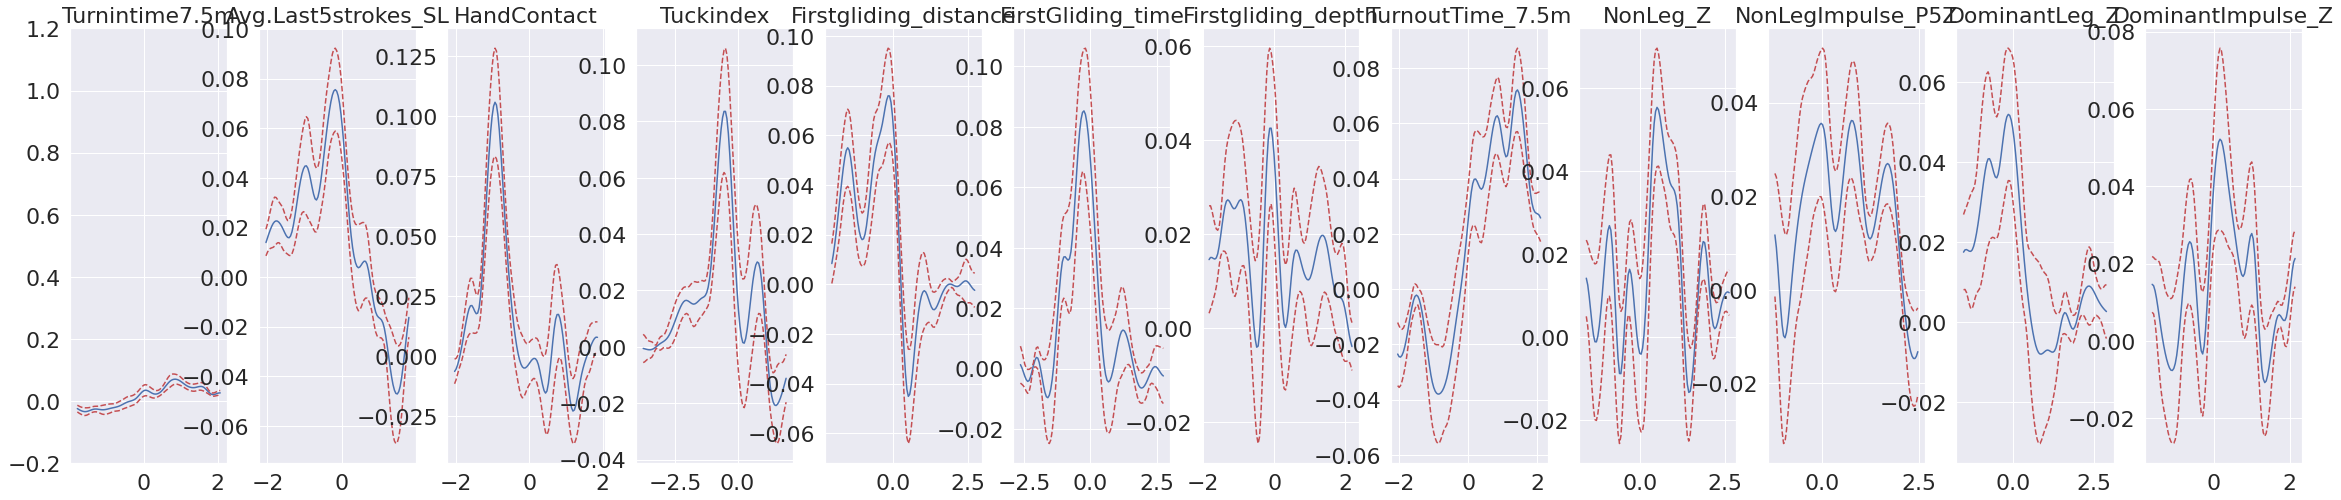

In [458]:
PlotAllFeatDep(X,gam)

Somersault

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      13.288
Link Function:                     IdentityLink Log Likelihood:                                 -1130.6528
Number of Samples:                           53 AIC:                                             2289.8815
                                                AICc:                                            2301.4658
                                                GCV:                                                0.0271
                                                Scale:                                              0.0152
                                                Pseudo R-Squared:                                   0.8128
Feature Function                  Lam

KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 



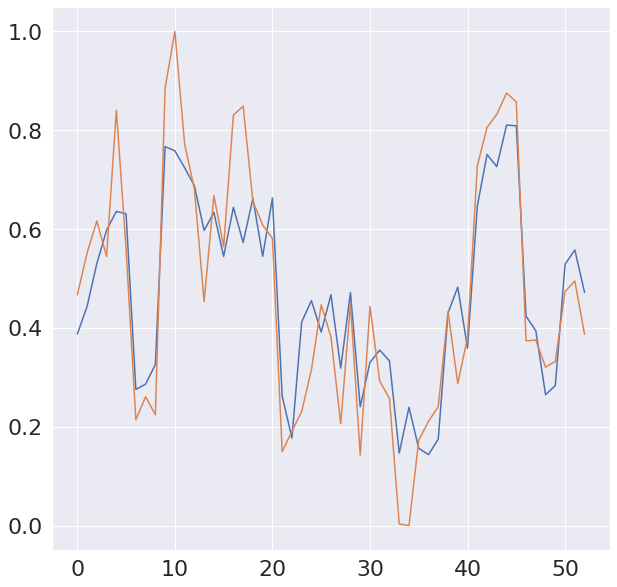

In [459]:
X=BD[3].drop(['TotalTurntime15m'], axis=1)
y=np.array(BD[3]['TotalTurntime15m'],dtype='float64')
gam=LinGAM(X,y)

<Figure size 720x720 with 0 Axes>

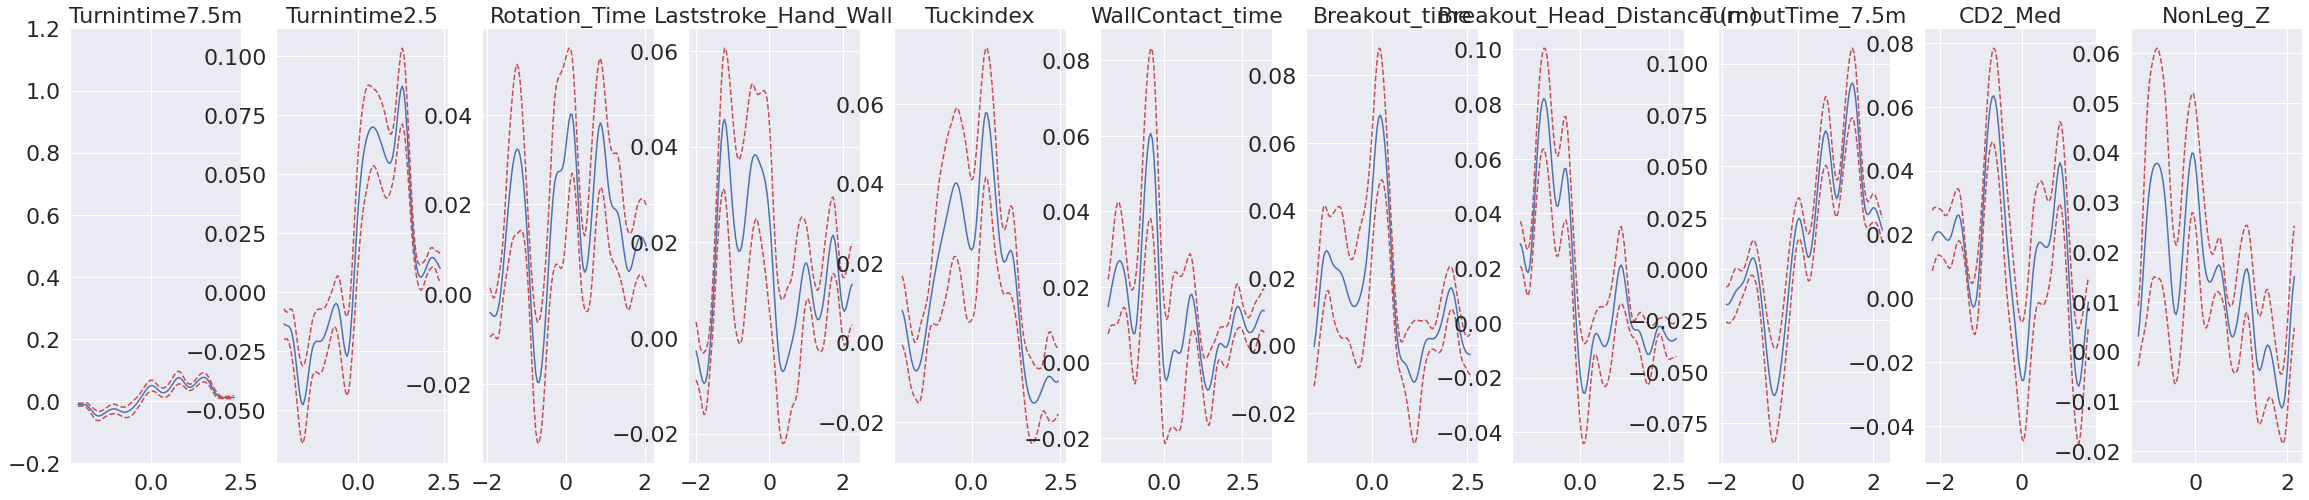

In [460]:
PlotAllFeatDep(X,gam)

In [461]:
TOC()


Elapsed time is 
25.05976629257202
seconds.

